# Sleep position classification

In [ ]:
# import the libraries
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns 
import natsort
from natsort import natsorted
import matplotlib.pyplot as plt
import os 
import csv

In [ ]:
#This code is used to create a dataset with all the processed data
mypath = os.getcwd() 
path1='./processed_data/'
files = [f for f in os.listdir(path1) if not f.startswith('.')]
files = natsorted(files)
files_csv= [f for f in files if f[-3:] == 'csv']
print(files_csv)
i=0
df=pd.DataFrame()
for f in files_csv: 
    file_name= './processed_data/'+ f
    print(file_name)
    data=pd.read_csv(file_name)
    df = df.append(data)

print(df.head())
df.to_csv('total_proc_py.csv', index=False, header=True

## 1. Data validation

In [ ]:
## Data import
df=pd.read_csv('total_proc_py.csv')


In [ ]:
print(df.shape)
df.head()

(120, 16)


,BR,WL,MAV,MV,STD,RMSE,Max,Min,VAR,SEN,MDF,MNF,Max_p,Min_p,r_axis,target
0,0.240080,-49.489306,0.016496,-0.016496,0.828765,0.024225,2.856031,-2.129246,-0.016502,10121.076678,50.301781,46.663023,711.235976,2.753353e-14,z,supine
1,0.220073,0.478272,0.000159,0.000159,0.507935,0.012104,1.034132,-1.496247,0.000160,34.109931,2.920185,18.695023,439.457656,4.096723e-14,z,supine
2,0.220073,16.022720,0.005343,0.005343,0.531967,0.012163,0.933654,-1.088899,0.005344,1189.987977,17.248101,40.609365,860.553796,1.476597e-14,z,supine
3,0.260087,-72.349807,0.024117,-0.024117,0.618624,0.017500,1.620029,-1.553317,-0.024125,19177.751270,69.241879,39.344414,526.384057,3.186340e-14,x,lateral R
4,0.260087,4.426925,0.001476,0.001476,0.415343,0.011135,0.848615,-0.834289,0.001477,15.765618,1.985297,96.913984,583.295626,1.665335e-16,x,lateral R


In [ ]:
## Check missing data
df.isnull().sum()

BR        0
WL        0
MAV       0
MV        0
STD       0
RMSE      0
Max       0
Min       0
VAR       0
SEN       0
MDF       0
MNF       0
Max_p     0
Min_p     0
r_axis    0
target    0
dtype: int64

In [ ]:
## Categorical variables
df.dtypes

BR        float64
WL        float64
MAV       float64
MV        float64
STD       float64
RMSE      float64
Max       float64
Min       float64
VAR       float64
SEN       float64
MDF       float64
MNF       float64
Max_p     float64
Min_p     float64
r_axis     object
target     object
dtype: object

## Univariate analisys: numerical data

In [ ]:
print(len(df.columns))

16


In [ ]:
# Split categorical and numerical variables
df_num=df.iloc[:,0:(len(df.columns)-2)]



df_num.head()


,BR,WL,MAV,MV,STD,RMSE,Max,Min,VAR,SEN,MDF,MNF,Max_p,Min_p
0,0.240080,-49.489306,0.016496,-0.016496,0.828765,0.024225,2.856031,-2.129246,-0.016502,10121.076678,50.301781,46.663023,711.235976,2.753353e-14
1,0.220073,0.478272,0.000159,0.000159,0.507935,0.012104,1.034132,-1.496247,0.000160,34.109931,2.920185,18.695023,439.457656,4.096723e-14
2,0.220073,16.022720,0.005343,0.005343,0.531967,0.012163,0.933654,-1.088899,0.005344,1189.987977,17.248101,40.609365,860.553796,1.476597e-14
3,0.260087,-72.349807,0.024117,-0.024117,0.618624,0.017500,1.620029,-1.553317,-0.024125,19177.751270,69.241879,39.344414,526.384057,3.186340e-14
4,0.260087,4.426925,0.001476,0.001476,0.415343,0.011135,0.848615,-0.834289,0.001477,15.765618,1.985297,96.913984,583.295626,1.665335e-16


In [ ]:
df_num

,BR,WL,MAV,MV,STD,RMSE,Max,Min,VAR,SEN,MDF,MNF,Max_p,Min_p
0,0.240080,-49.489306,0.016496,-0.016496,0.828765,0.024225,2.856031,-2.129246,-0.016502,10121.076678,50.301781,46.663023,711.235976,2.753353e-14
1,0.220073,0.478272,0.000159,0.000159,0.507935,0.012104,1.034132,-1.496247,0.000160,34.109931,2.920185,18.695023,439.457656,4.096723e-14
2,0.220073,16.022720,0.005343,0.005343,0.531967,0.012163,0.933654,-1.088899,0.005344,1189.987977,17.248101,40.609365,860.553796,1.476597e-14
3,0.260087,-72.349807,0.024117,-0.024117,0.618624,0.017500,1.620029,-1.553317,-0.024125,19177.751270,69.241879,39.344414,526.384057,3.186340e-14
4,0.260087,4.426925,0.001476,0.001476,0.415343,0.011135,0.848615,-0.834289,0.001477,15.765618,1.985297,96.913984,583.295626,1.665335e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.300100,-23.945668,0.007985,-0.007985,0.277522,0.008231,1.030795,-0.963738,-0.007987,1663.695798,20.394214,36.912484,299.056282,1.565414e-14
116,0.260087,9.330342,0.003111,0.003111,0.210104,0.006094,0.563488,-0.757839,0.003112,334.496317,9.144620,45.463654,210.754927,8.326673e-15
117,0.060020,5.913591,0.001971,0.001971,0.331902,0.007434,0.783421,-0.908550,0.001972,171.517668,6.548238,62.681782,373.320709,3.477774e-14
118,0.100033,-2.784492,0.000928,-0.000928,0.213264,0.005937,0.470299,-0.624875,-0.000929,217.126050,7.367599,74.158073,205.519786,1.801337e-14


Outlier correction: removing the 25% and 75% quartile of the distribution (when the distribution is Gaussian)

array([[<AxesSubplot:title={'center':'BR'}>,
        <AxesSubplot:title={'center':'WL'}>,
        <AxesSubplot:title={'center':'MAV'}>,
        <AxesSubplot:title={'center':'MV'}>],
       [<AxesSubplot:title={'center':'STD'}>,
        <AxesSubplot:title={'center':'RMSE'}>,
        <AxesSubplot:title={'center':'Max'}>,
        <AxesSubplot:title={'center':'Min'}>],
       [<AxesSubplot:title={'center':'VAR'}>,
        <AxesSubplot:title={'center':'SEN'}>,
        <AxesSubplot:title={'center':'MDF'}>,
        <AxesSubplot:title={'center':'MNF'}>],
       [<AxesSubplot:title={'center':'Max_p'}>,
        <AxesSubplot:title={'center':'Min_p'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

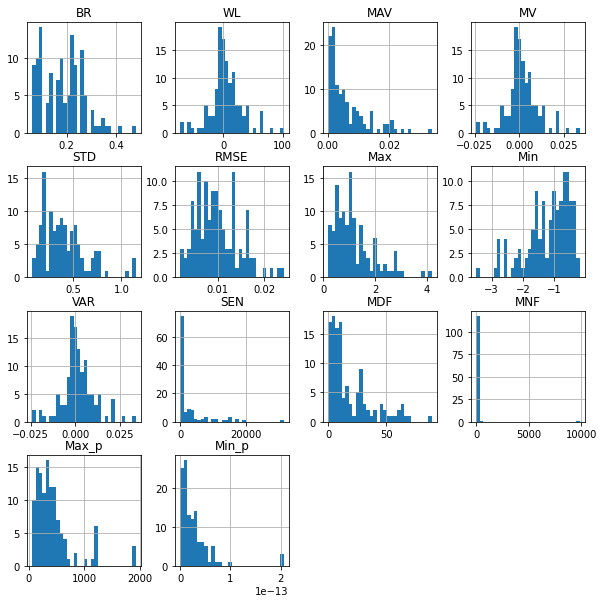

In [ ]:
df_num.hist(figsize=(10,10), bins=30)

<AxesSubplot:xlabel='WL'>

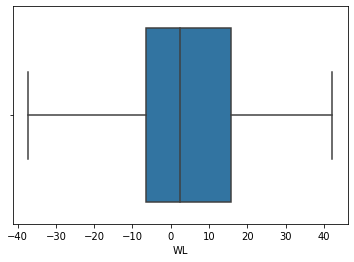

In [ ]:
for x in ['WL']:
    q75,q25 = np.percentile(df_num.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df_num.loc[df_num[x] < min,x] = np.nan
    df_num.loc[df_num[x] > max,x] = np.nan
sns.boxplot(x=df_num['WL'])

<AxesSubplot:xlabel='Max_p'>

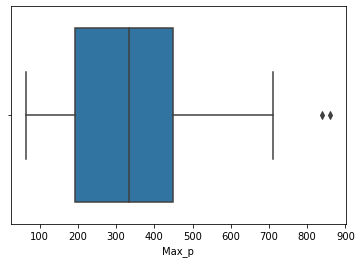

In [ ]:
for x in ['Max_p']:
    q75,q25 = np.percentile(df_num.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df_num.loc[df_num[x] < min,x] = np.nan
    df_num.loc[df_num[x] > max,x] = np.nan

sns.boxplot(x=df_num['Max_p'])

<AxesSubplot:xlabel='BR'>

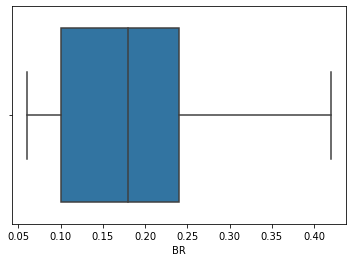

In [ ]:
for x in ['BR']:
    q75,q25 = np.percentile(df_num.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df_num.loc[df_num[x] < min,x] = np.nan
    df_num.loc[df_num[x] > max,x] = np.nan

sns.boxplot(x=df_num['BR'])

<AxesSubplot:xlabel='MV'>

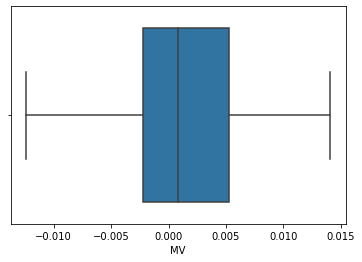

In [ ]:
for x in ['MV']:
    q75,q25 = np.percentile(df_num.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df_num.loc[df_num[x] < min,x] = np.nan
    df_num.loc[df_num[x] > max,x] = np.nan

sns.boxplot(x=df_num['MV'])

<AxesSubplot:xlabel='VAR'>

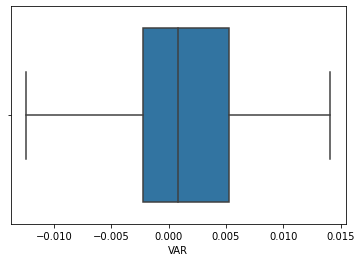

In [ ]:
for x in ['VAR']:
    q75,q25 = np.percentile(df_num.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df_num.loc[df_num[x] < min,x] = np.nan
    df_num.loc[df_num[x] > max,x] = np.nan

sns.boxplot(x=df_num['VAR'])

array([[<AxesSubplot:title={'center':'BR'}>]], dtype=object)

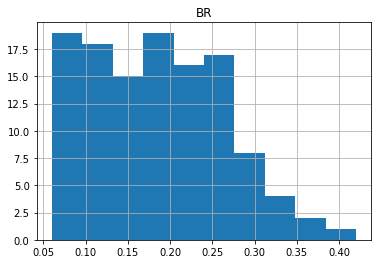

In [ ]:
df_num.hist(column="BR")

array([[<AxesSubplot:title={'center':'SEN'}>]], dtype=object)

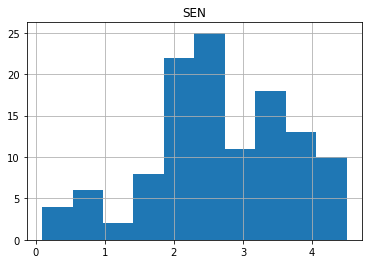

In [ ]:
df_num['SEN']=np.log10(df_num["SEN"])


for x in ['SEN']:
    q75,q25 = np.percentile(df_num.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df_num.loc[df_num[x] < min,x] = np.nan
    df_num.loc[df_num[x] > max,x] = np.nan

df_num.hist(column="SEN")

array([[<AxesSubplot:title={'center':'MNF'}>]], dtype=object)

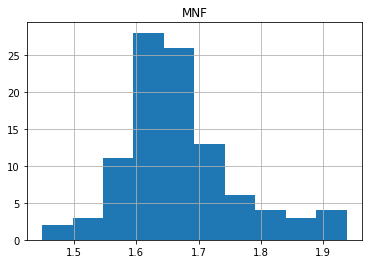

In [ ]:
df_num['MNF']=np.log10(df_num["MNF"])


for x in ['MNF']:
    q75,q25 = np.percentile(df_num.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df_num.loc[df_num[x] < min,x] = np.nan
    df_num.loc[df_num[x] > max,x] = np.nan

df_num.hist(column="MNF")

array([[<AxesSubplot:title={'center':'MDF'}>]], dtype=object)

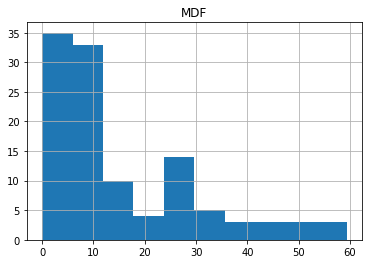

In [ ]:



for x in ['MDF']:
    q75,q25 = np.percentile(df_num.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df_num.loc[df_num[x] < min,x] = np.nan
    df_num.loc[df_num[x] > max,x] = np.nan

df_num.hist(column="MDF")

<AxesSubplot:xlabel='MDF'>

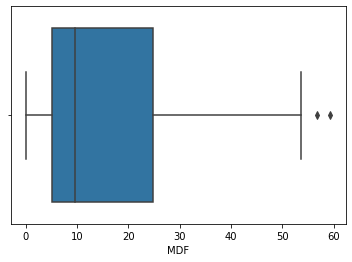

In [ ]:
sns.boxplot(x=df_num['MDF'])

c:\Users\Laura\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


array([[<AxesSubplot:title={'center':'Min_p'}>]], dtype=object)

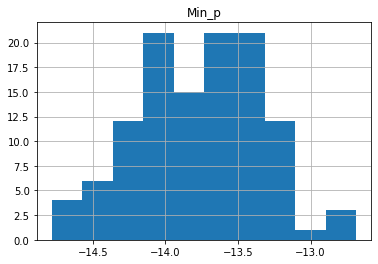

In [ ]:
df_num['Min_p']=np.log10(df_num["Min_p"])


for x in ['Min_p']:
    q75,q25 = np.percentile(df_num.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df_num.loc[df_num[x] < min,x] = np.nan
    df_num.loc[df_num[x] > max,x] = np.nan

df_num.hist(column="Min_p")

array([[<AxesSubplot:title={'center':'BR'}>,
        <AxesSubplot:title={'center':'WL'}>,
        <AxesSubplot:title={'center':'MAV'}>,
        <AxesSubplot:title={'center':'MV'}>],
       [<AxesSubplot:title={'center':'STD'}>,
        <AxesSubplot:title={'center':'RMSE'}>,
        <AxesSubplot:title={'center':'Max'}>,
        <AxesSubplot:title={'center':'Min'}>],
       [<AxesSubplot:title={'center':'VAR'}>,
        <AxesSubplot:title={'center':'SEN'}>,
        <AxesSubplot:title={'center':'MDF'}>,
        <AxesSubplot:title={'center':'MNF'}>],
       [<AxesSubplot:title={'center':'Max_p'}>,
        <AxesSubplot:title={'center':'Min_p'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

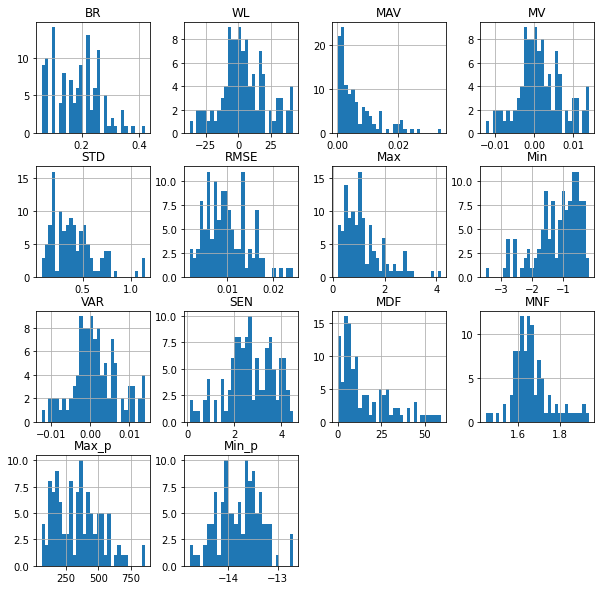

In [ ]:


df_num.hist(figsize=(10,10), bins=30)

<AxesSubplot:xlabel='MDF'>

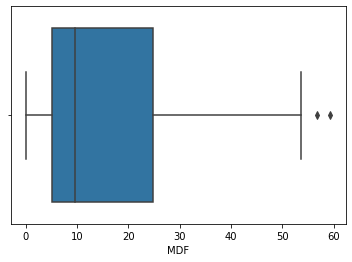

In [ ]:
sns.boxplot(x=df_num['MDF'])

In [ ]:
df_num.head

<bound method NDFrame.head of            BR         WL       MAV        MV       STD      RMSE       Max  \
0    0.240080        NaN  0.016496       NaN  0.828765  0.024225  2.856031   
1    0.220073   0.478272  0.000159  0.000159  0.507935  0.012104  1.034132   
2    0.220073  16.022720  0.005343  0.005343  0.531967  0.012163  0.933654   
3    0.260087        NaN  0.024117       NaN  0.618624  0.017500  1.620029   
4    0.260087   4.426925  0.001476  0.001476  0.415343  0.011135  0.848615   
..        ...        ...       ...       ...       ...       ...       ...   
115  0.300100 -23.945668  0.007985 -0.007985  0.277522  0.008231  1.030795   
116  0.260087   9.330342  0.003111  0.003111  0.210104  0.006094  0.563488   
117  0.060020   5.913591  0.001971  0.001971  0.331902  0.007434  0.783421   
118  0.100033  -2.784492  0.000928 -0.000928  0.213264  0.005937  0.470299   
119  0.280093  -1.361530  0.000454 -0.000454  0.180404  0.004941  0.487671   

          Min       VAR       SEN

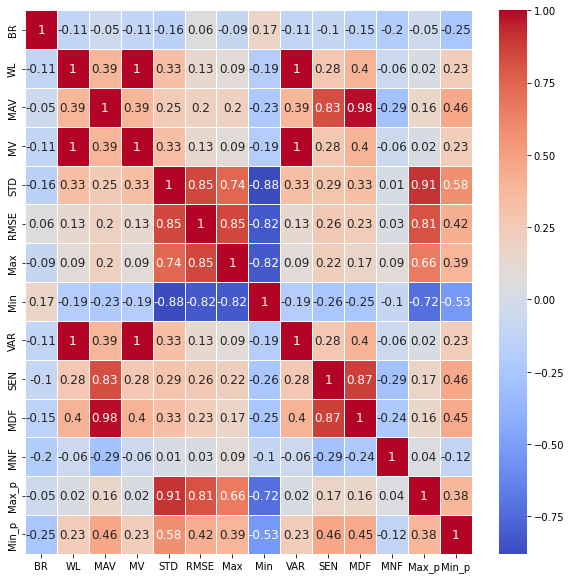

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#plot to visualize the correlations in the matrix

plt.figure(figsize = (10,10))
sns.heatmap(data=df_num.corr().round(2), cmap='coolwarm', linewidths=.5, annot=True, annot_kws={"size":12})
plt.show()

In [ ]:
df_num=df_num.drop(['MDF','STD','Max_p'],axis=1)

In [ ]:
df_num=df_num.drop(['Min','VAR','MV'],axis=1)

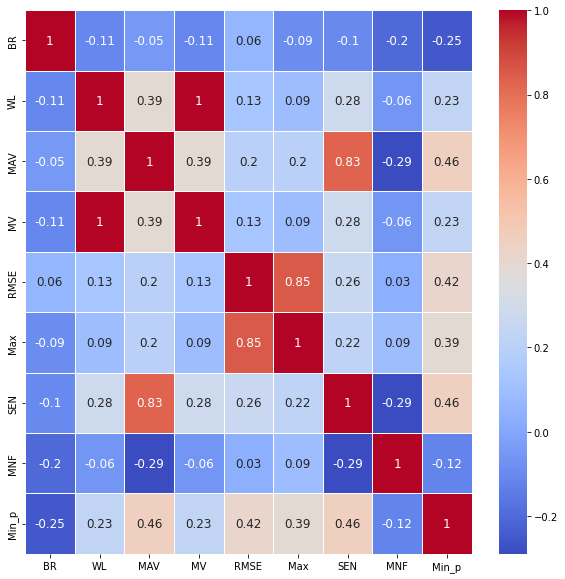

In [ ]:

plt.figure(figsize = (10,10))
sns.heatmap(data=df_num.corr().round(2), cmap='coolwarm', linewidths=.5, annot=True, annot_kws={"size":12})
plt.show()

In [ ]:
#dummy variable for axis position (categorical variable) 
dummy = pd.get_dummies(df['r_axis'],drop_first=True)  
dummy

,z
0,1
1,1
2,1
3,0
4,0
...,...
115,0
116,0
117,1
118,1


In [ ]:
y=df['target']

In [ ]:
df_num=pd.concat([df_num,dummy, y],axis=1)
df_num

,BR,WL,MAV,MV,RMSE,Max,SEN,MNF,Min_p,z,target
0,0.240080,NaN,0.016496,NaN,0.024225,2.856031,4.005227,1.668973,-13.560138,1,supine
1,0.220073,0.478272,0.000159,0.000159,0.012104,1.034132,1.532881,NaN,-13.387563,1,supine
2,0.220073,16.022720,0.005343,0.005343,0.012163,0.933654,3.075543,1.608626,-13.830738,1,supine
3,0.260087,NaN,0.024117,NaN,0.017500,1.620029,4.282798,1.594883,-13.496708,0,lateral R
4,0.260087,4.426925,0.001476,0.001476,0.011135,0.848615,1.197711,NaN,NaN,0,lateral R
...,...,...,...,...,...,...,...,...,...,...,...
115,0.300100,-23.945668,0.007985,-0.007985,0.008231,1.030795,3.221074,1.567173,-13.805371,0,lateral L
116,0.260087,9.330342,0.003111,0.003111,0.006094,0.563488,2.524391,1.657664,-14.079529,0,lateral L
117,0.060020,5.913591,0.001971,0.001971,0.007434,0.783421,2.234309,1.797141,-13.458699,1,prone
118,0.100033,-2.784492,0.000928,-0.000928,0.005937,0.470299,2.336712,1.870158,-13.744405,1,prone


In [ ]:
df_num=df_num.fillna(np.mean(df_num))
df_num
z=df_num[['z','target']]
df_num=df_num.drop(['z','target'], axis = 1)


c:\Users\Laura\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
c:\Users\Laura\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
print(df_num)

           BR         WL       MAV        MV      RMSE       Max       SEN  \
0    0.240080   4.111350  0.016496  0.001371  0.024225  2.856031  4.005227   
1    0.220073   0.478272  0.000159  0.000159  0.012104  1.034132  1.532881   
2    0.220073  16.022720  0.005343  0.005343  0.012163  0.933654  3.075543   
3    0.260087   4.111350  0.024117  0.001371  0.017500  1.620029  4.282798   
4    0.260087   4.426925  0.001476  0.001476  0.011135  0.848615  1.197711   
..        ...        ...       ...       ...       ...       ...       ...   
115  0.300100 -23.945668  0.007985 -0.007985  0.008231  1.030795  3.221074   
116  0.260087   9.330342  0.003111  0.003111  0.006094  0.563488  2.524391   
117  0.060020   5.913591  0.001971  0.001971  0.007434  0.783421  2.234309   
118  0.100033  -2.784492  0.000928 -0.000928  0.005937  0.470299  2.336712   
119  0.280093  -1.361530  0.000454 -0.000454  0.004941  0.487671  0.811664   

          MNF      Min_p  
0    1.668973 -13.560138  
1    1.66

In [ ]:
print(len(df_num.columns))

9


In [ ]:
print(df_num.shape)
df.head()

(120, 9)


,BR,WL,MAV,MV,STD,RMSE,Max,Min,VAR,SEN,MDF,MNF,Max_p,Min_p,r_axis,target
0,0.240080,-49.489306,0.016496,-0.016496,0.828765,0.024225,2.856031,-2.129246,-0.016502,10121.076678,50.301781,46.663023,711.235976,2.753353e-14,z,supine
1,0.220073,0.478272,0.000159,0.000159,0.507935,0.012104,1.034132,-1.496247,0.000160,34.109931,2.920185,18.695023,439.457656,4.096723e-14,z,supine
2,0.220073,16.022720,0.005343,0.005343,0.531967,0.012163,0.933654,-1.088899,0.005344,1189.987977,17.248101,40.609365,860.553796,1.476597e-14,z,supine
3,0.260087,-72.349807,0.024117,-0.024117,0.618624,0.017500,1.620029,-1.553317,-0.024125,19177.751270,69.241879,39.344414,526.384057,3.186340e-14,x,lateral R
4,0.260087,4.426925,0.001476,0.001476,0.415343,0.011135,0.848615,-0.834289,0.001477,15.765618,1.985297,96.913984,583.295626,1.665335e-16,x,lateral R


array([[<AxesSubplot:title={'center':'BR'}>,
        <AxesSubplot:title={'center':'WL'}>,
        <AxesSubplot:title={'center':'MAV'}>],
       [<AxesSubplot:title={'center':'MV'}>,
        <AxesSubplot:title={'center':'RMSE'}>,
        <AxesSubplot:title={'center':'Max'}>],
       [<AxesSubplot:title={'center':'SEN'}>,
        <AxesSubplot:title={'center':'MNF'}>,
        <AxesSubplot:title={'center':'Min_p'}>]], dtype=object)

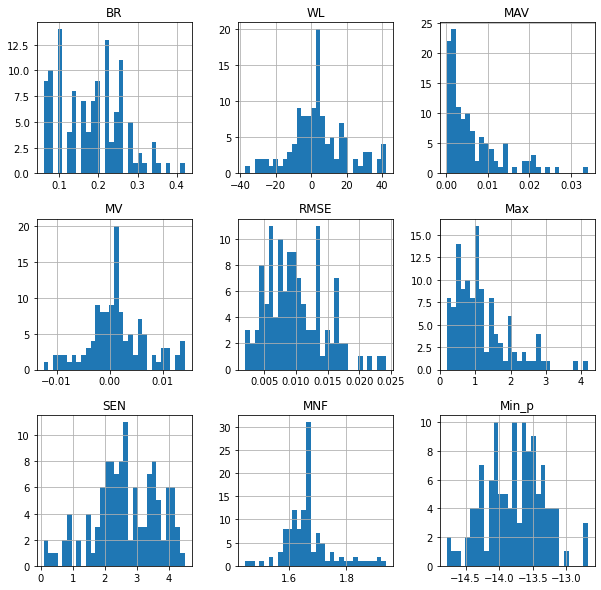

In [ ]:
df_num.hist(figsize=(10,10), bins=30)

## Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df_num)
scaled_df = pd.DataFrame(scaler.transform(df_num))
scaled_df.columns = df_num.columns
scaled_df.index=df_num.index
scaled_df.head()



,BR,WL,MAV,MV,RMSE,Max,SEN,MNF,Min_p
0,0.704054,0.000000,1.558654,-4.002316e-17,3.131055,2.177324,1.352775,0.006931,4.707924e-01
1,0.458358,-0.223579,-0.943160,-2.235735e-01,0.481702,-0.190918,-1.153135,0.000000,8.757131e-01
2,0.458358,0.733023,-0.149412,7.331136e-01,0.494537,-0.321527,0.410469,-0.717355,-1.641302e-01
3,0.949751,0.000000,2.725593,-4.002316e-17,1.661147,0.570676,1.634114,-0.882301,6.196219e-01
4,0.949751,0.019420,-0.741529,1.944731e-02,0.269921,-0.432067,-1.492855,0.000000,-8.335912e-15


In [ ]:
df_num=scaled_df

<AxesSubplot:>

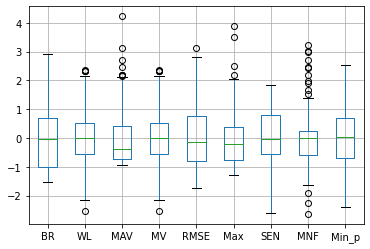

In [ ]:
scaled_df.boxplot()

array([[<AxesSubplot:title={'center':'BR'}>,
        <AxesSubplot:title={'center':'WL'}>,
        <AxesSubplot:title={'center':'MAV'}>],
       [<AxesSubplot:title={'center':'MV'}>,
        <AxesSubplot:title={'center':'RMSE'}>,
        <AxesSubplot:title={'center':'Max'}>],
       [<AxesSubplot:title={'center':'SEN'}>,
        <AxesSubplot:title={'center':'MNF'}>,
        <AxesSubplot:title={'center':'Min_p'}>]], dtype=object)

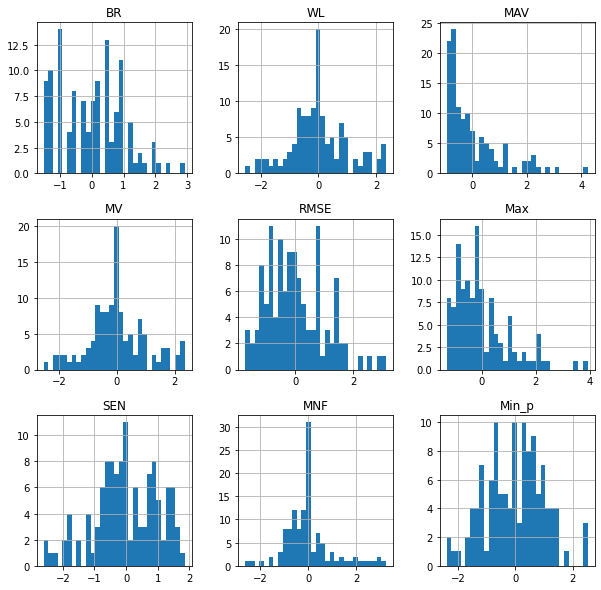

In [ ]:
df_num.hist(figsize=(10,10), bins=30)

In [ ]:
df_num.apply(lambda s: df_num.corrwith(s))

,BR,WL,MAV,MV,RMSE,Max,SEN,MNF,Min_p
BR,1.000000,-0.106884,-0.051050,-0.106871,0.060659,-0.092938,-0.103387,-0.186808,-0.248561
WL,-0.106884,1.000000,0.215950,1.000000,0.124745,0.089433,0.241602,-0.050879,0.220336
MAV,-0.051050,0.215950,1.000000,0.215962,0.202951,0.201121,0.831441,-0.269017,0.457720
MV,-0.106871,1.000000,0.215962,1.000000,0.124735,0.089429,0.241613,-0.050883,0.220331
RMSE,0.060659,0.124745,0.202951,0.124735,1.000000,0.845936,0.252193,0.029019,0.409354
Max,-0.092938,0.089433,0.201121,0.089429,0.845936,1.000000,0.219361,0.083973,0.391082
SEN,-0.103387,0.241602,0.831441,0.241613,0.252193,0.219361,1.000000,-0.221353,0.451971
MNF,-0.186808,-0.050879,-0.269017,-0.050883,0.029019,0.083973,-0.221353,1.000000,-0.103918
Min_p,-0.248561,0.220336,0.457720,0.220331,0.409354,0.391082,0.451971,-0.103918,1.000000


## Separate Train set and Test set

In [ ]:
print(df_num)

           BR        WL       MAV            MV      RMSE       Max       SEN  \
0    0.704054  0.000000  1.558654 -4.002316e-17  3.131055  2.177324  1.352775   
1    0.458358 -0.223579 -0.943160 -2.235735e-01  0.481702 -0.190918 -1.153135   
2    0.458358  0.733023 -0.149412  7.331136e-01  0.494537 -0.321527  0.410469   
3    0.949751  0.000000  2.725593 -4.002316e-17  1.661147  0.570676  1.634114   
4    0.949751  0.019420 -0.741529  1.944731e-02  0.269921 -0.432067 -1.492855   
..        ...       ...       ...           ...       ...       ...       ...   
115  1.441144 -1.726622  0.255158 -1.726751e+00 -0.364919 -0.195256  0.557976   
116  0.949751  0.321176 -0.491146  3.212294e-01 -0.831938 -0.802697 -0.148164   
117 -1.507214  0.110910 -0.665716  1.108233e-01 -0.538974 -0.516811 -0.442184   
118 -1.015821 -0.424369 -0.825397 -4.243812e-01 -0.866187 -0.923831 -0.338391   
119  1.195448 -0.336800 -0.898058 -3.368047e-01 -1.083957 -0.901250 -1.884142   

          MNF         Min_p

In [ ]:
df_num=pd.concat([df_num,dummy],axis=1)

In [ ]:
y=df['target']


In [ ]:
print(df_num)

           BR        WL       MAV            MV      RMSE       Max       SEN  \
0    0.704054  0.000000  1.558654 -4.002316e-17  3.131055  2.177324  1.352775   
1    0.458358 -0.223579 -0.943160 -2.235735e-01  0.481702 -0.190918 -1.153135   
2    0.458358  0.733023 -0.149412  7.331136e-01  0.494537 -0.321527  0.410469   
3    0.949751  0.000000  2.725593 -4.002316e-17  1.661147  0.570676  1.634114   
4    0.949751  0.019420 -0.741529  1.944731e-02  0.269921 -0.432067 -1.492855   
..        ...       ...       ...           ...       ...       ...       ...   
115  1.441144 -1.726622  0.255158 -1.726751e+00 -0.364919 -0.195256  0.557976   
116  0.949751  0.321176 -0.491146  3.212294e-01 -0.831938 -0.802697 -0.148164   
117 -1.507214  0.110910 -0.665716  1.108233e-01 -0.538974 -0.516811 -0.442184   
118 -1.015821 -0.424369 -0.825397 -4.243812e-01 -0.866187 -0.923831 -0.338391   
119  1.195448 -0.336800 -0.898058 -3.368047e-01 -1.083957 -0.901250 -1.884142   

          MNF         Min_p

In [ ]:
x=df_num


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size =0.30,
                                                    stratify=y,
                                                    random_state= 123) 
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(84, 10) (36, 10) (84,) (36,)


## Models

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import f1_score


### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(5,20,1)} 






In [ ]:
def hyperp_search(classifier, parameters):
    gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'accuracy', verbose=0, n_jobs=-1)
    gs = gs.fit(X_train, y_train)
    print("accuracy_train: %f using %s" % (gs.best_score_, gs.best_params_))


In [ ]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
grid = GridSearchCV(knn, parameters, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


In [ ]:
print(grid_search.best_params_)

{'n_neighbors': 19}


In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=19)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)
result = confusion_matrix(y_test, y_pred)


print('Confusion Matrix:')
print(result)

Confusion Matrix:
[[4 3 1 1]
 [2 4 1 2]
 [2 1 4 2]
 [2 0 3 4]]
Classification Report:”
              precision    recall  f1-score   support

   lateral L       0.40      0.44      0.42         9
   lateral R       0.50      0.44      0.47         9
       prone       0.44      0.44      0.44         9
      supine       0.44      0.44      0.44         9

    accuracy                           0.44        36
   macro avg       0.45      0.44      0.45        36
weighted avg       0.45      0.44      0.45        36

Accuracy: 0.4444444444444444


In [ ]:
## EVALUATE THE PREDICTION (ON Y TEST)
model_knn.fit(X_train, y_train)
y_pred=model_knn.predict(X_test)
from sklearn import metrics 
print('***RESULTS ON TEST SET***')
print("precision: ", metrics.precision_score(y_test, y_pred, average='macro')) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_test, y_pred, average='macro')) # tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_test, y_pred, average='macro')) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_test, y_pred)) # (tp+tn)/m



***RESULTS ON TEST SET***
precision:  0.44722222222222224
recall:  0.4444444444444444
f1_score:  0.4451324389404885
accuracy:  0.4444444444444444


In [ ]:
print(confusion_matrix(y_test, y_pred))

[[4 3 1 1]
 [2 4 1 2]
 [2 1 4 2]
 [2 0 3 4]]


In [ ]:
## We can try on the train data
y_pred_train=model_knn.predict(X_train)

In [ ]:
metrics.f1_score(y_train, y_pred_train, average='macro')

0.5121774585374181

In [ ]:
## f1 train is similar to f1 test--> No overfitting

### Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
parameters = {'criterion': ['entropy','gini'], 
              'max_depth': [2,3,4], 
              'min_samples_split': [5,10,20,100],
              'min_samples_leaf': [2,4,10]} 


In [ ]:
hyperp_search(classifier,parameters)

accuracy_train: 0.678571 using {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [ ]:
model_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=2, min_samples_split=5)

[[7 2 0 0]
 [4 5 0 0]
 [0 0 4 5]
 [0 0 3 6]]


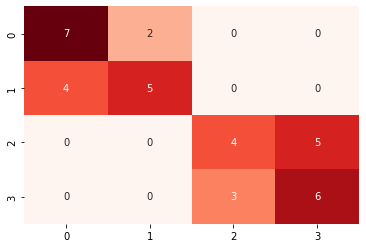

In [ ]:
model_tree.fit(X_train, y_train)
y_pred=model_tree.predict(X_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds", cbar=False);


In [ ]:
## EVALUATE THE PREDICTION (ON Y TEST)
from sklearn import metrics 
print('***RESULTS ON TEST SET***')
print("precision: ", metrics.precision_score(y_test, y_pred, average='macro')) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_test, y_pred, average='macro')) # tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_test, y_pred, average='macro')) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_test, y_pred)) # (tp+tn)/m

***RESULTS ON TEST SET***
precision:  0.6168831168831168
recall:  0.6111111111111112
f1_score:  0.6062500000000001
accuracy:  0.6111111111111112


In [ ]:
## We can try on the train data
y_pred_train=model_tree.predict(X_train)
metrics.f1_score(y_train, y_pred_train, average='macro')

0.831628787878788

In [ ]:
### Plotting the tree
from sklearn import tree
r = tree.export_text(model_tree,feature_names=X_test.columns.tolist(),max_depth=5)
print(r)


|--- z <= 0.50
|   |--- BR <= 0.21
|   |   |--- MAV <= 1.52
|   |   |   |--- class: lateral L
|   |   |--- MAV >  1.52
|   |   |   |--- class: lateral R
|   |--- BR >  0.21
|   |   |--- Max <= -0.48
|   |   |   |--- class: lateral L
|   |   |--- Max >  -0.48
|   |   |   |--- class: lateral R
|--- z >  0.50
|   |--- Min_p <= 0.88
|   |   |--- MV <= -0.26
|   |   |   |--- class: prone
|   |   |--- MV >  -0.26
|   |   |   |--- class: supine
|   |--- Min_p >  0.88
|   |   |--- MNF <= -0.19
|   |   |   |--- class: prone
|   |   |--- MNF >  -0.19
|   |   |   |--- class: prone



### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
modelNB=GaussianNB()

In [ ]:
modelNB.fit(X_train, y_train)
y_pred=modelNB.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score
print("f1_score: ", f1_score(y_test, y_pred, average='macro'))

print("f1_test: ", f1_score(y_test, y_pred, average='macro'))

f1_score:  0.4984520123839009
f1_test:  0.4984520123839009


[[4 5 0 0]
 [4 5 0 0]
 [0 0 5 4]
 [0 0 5 4]]


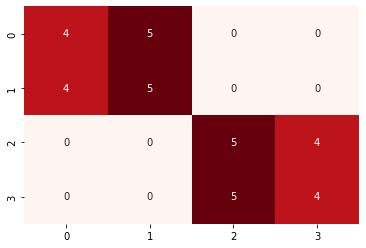

In [ ]:
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds", cbar=False);


In [ ]:
## We can try on the train data
y_pred_train=modelNB.predict(X_train)
metrics.f1_score(y_train, y_pred_train, average='macro')

0.7211779598747684

In [ ]:
from sklearn import metrics 
print('***RESULTS ON TEST SET***')
print("precision: ", metrics.precision_score(y_test, y_pred, average='macro')) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_test, y_pred, average='macro')) # tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_test, y_pred, average='macro')) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_test, y_pred)) # (tp+tn)/m

***RESULTS ON TEST SET***
precision:  0.5
recall:  0.5
f1_score:  0.4984520123839009
accuracy:  0.5


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
parameters = {"C":[0.1,1,10,100],"penalty":['l2'], "max_iter":[1000] }


hyperp_search(classifier,parameters)


accuracy_train: 0.511905 using {'C': 100, 'max_iter': 1000, 'penalty': 'l2'}


In [ ]:
model = LogisticRegression(C=1, penalty='l2', max_iter=1000)

In [ ]:
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

from sklearn.metrics import f1_score
print("f1_score: ", f1_score(y_test, y_pred, average='macro'))

print("f1_test: ", f1_score(y_test, y_pred, average='macro'))



f1_score:  0.5492260061919504
f1_test:  0.5492260061919504


[[4 5 0 0]
 [2 7 0 0]
 [0 0 4 5]
 [0 0 4 5]]


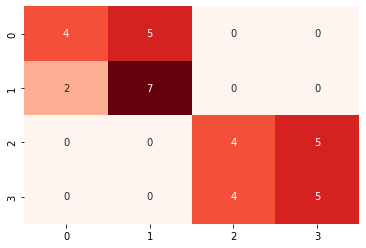

In [ ]:
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds", cbar=False);

In [ ]:
## We can try on the train data
y_pred_train=model.predict(X_train)
metrics.f1_score(y_train, y_pred_train, average='macro')

0.6771625233148718

In [ ]:
from sklearn import metrics 
print('***RESULTS ON TEST SET***')
print("precision: ", metrics.precision_score(y_test, y_pred, average='macro')) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_test, y_pred, average='macro')) # tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_test, y_pred, average='macro')) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_test, y_pred)) # (tp+tn)/m

***RESULTS ON TEST SET***
precision:  0.5625
recall:  0.5555555555555556
f1_score:  0.5492260061919504
accuracy:  0.5555555555555556


### Multi-layer Perceptron Classifier

In [ ]:
# Multi-layer Perceptron classifier

from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier()
parameters = {"hidden_layer_sizes":[(10, 5),(100,20,5)],  "max_iter": [2000,10000], "alpha": [0.001,0.0001]}

hyperp_search(classifier,parameters)


accuracy_train: 0.642857 using {'alpha': 0.0001, 'hidden_layer_sizes': (100, 20, 5), 'max_iter': 10000}


In [ ]:
model_MLP=MLPClassifier(hidden_layer_sizes=(100,20,5), alpha=0.001, max_iter=2000)



In [ ]:
model_MLP.fit(X_train, y_train)
y_pred=model_MLP.predict(X_test)



[[2 7 0 0]
 [2 7 0 0]
 [0 1 4 4]
 [1 0 5 3]]


C:\Users\Laura\AppData\Local\Temp\ipykernel_25388\2586729041.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(['supino','destra','sinistra']); ax.yaxis.set_ticklabels(['supino','destra','sinistra']);


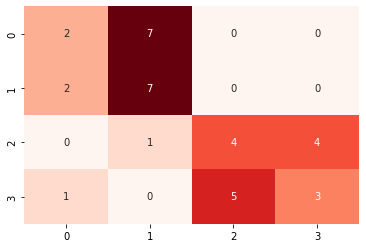

In [ ]:
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds", cbar=False);
ax.xaxis.set_ticklabels(['supino','destra','sinistra']); ax.yaxis.set_ticklabels(['supino','destra','sinistra']);

In [ ]:
## We can try on the train data
y_pred_train=model_MLP.predict(X_train)
metrics.f1_score(y_train, y_pred_train, average='macro')

1.0

In [ ]:
from sklearn import metrics 
print('***RESULTS ON TEST SET***')
print("precision: ", metrics.precision_score(y_test, y_pred, average='macro')) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_test, y_pred, average='macro')) # tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_test, y_pred, average='macro')) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_test, y_pred)) # (tp+tn)/m

***RESULTS ON TEST SET***
precision:  0.43492063492063493
recall:  0.4444444444444444
f1_score:  0.42212301587301587
accuracy:  0.4444444444444444


### SVM

In [ ]:
from sklearn.svm import SVC

classifier = SVC()
model_SVM=SVC(kernel='linear',probability=True)



In [ ]:
model_SVM.fit(X_train, y_train)
y_pred=model_SVM.predict(X_test)


[[5 4 0 0]
 [2 7 0 0]
 [0 0 6 3]
 [0 0 6 3]]


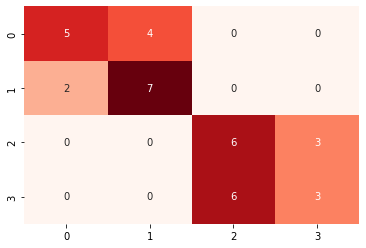

In [ ]:
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds", cbar=False);

In [ ]:
## We can try on the train data
y_pred_train=model_SVM.predict(X_train)
metrics.f1_score(y_train, y_pred_train, average='macro')

0.6852607709750567

In [ ]:
from sklearn import metrics 
print('***RESULTS ON TEST SET***')
print("precision: ", metrics.precision_score(y_test, y_pred, average='macro')) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_test, y_pred,average='macro')) # tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_test, y_pred, average='macro')) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_test, y_pred)) # (tp+tn)/m

***RESULTS ON TEST SET***
precision:  0.5876623376623377
recall:  0.5833333333333334
f1_score:  0.5741071428571429
accuracy:  0.5833333333333334


### Random Forest

In [ ]:
parameters = {'n_estimators':np.arange(1,100,20),
              'criterion': ['entropy','gini'], 
              'max_depth': np.arange(2,5,1), 
              'min_samples_split': np.arange(1,40,10),
              'min_samples_leaf': np.arange(1,40,10)} 



In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
hyperp_search(classifier,parameters)

accuracy_train: 0.666667 using {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 11, 'min_samples_split': 11, 'n_estimators': 81}


c:\Users\Laura\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
360 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Laura\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Laura\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "c:\Users\Laura\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\parallel

In [ ]:
model_RF=RandomForestClassifier(n_estimators=81, criterion='entropy', max_depth=4, min_samples_split=11, min_samples_leaf=11)

In [ ]:
model_RF.fit(X_train, y_train)
y_pred=model_RF.predict(X_test)

[[5 4 0 0]
 [3 6 0 0]
 [0 0 6 3]
 [0 0 6 3]]


C:\Users\Laura\AppData\Local\Temp\ipykernel_25388\2804557806.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(['supino','destra','sinistra']); ax.yaxis.set_ticklabels(['supino','destra','sinistra']);


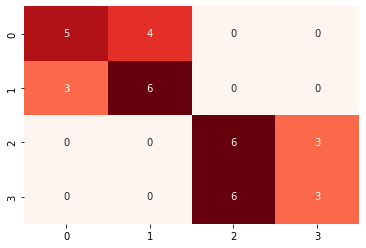

In [ ]:

print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds", cbar=False);
ax.xaxis.set_ticklabels(['supino','destra','sinistra']); ax.yaxis.set_ticklabels(['supino','destra','sinistra']);

In [ ]:
## We can try on the train data
y_pred_train=model_RF.predict(X_train)
metrics.f1_score(y_train, y_pred_train, average='macro')

0.8685120435120435

In [ ]:
from sklearn import metrics 
print('***RESULTS ON TEST SET***')
print("precision: ", metrics.precision_score(y_test, y_pred, average='macro')) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_test, y_pred, average='macro'))# tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_test, y_pred, average='macro')) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_test, y_pred)) # (tp+tn)/m

***RESULTS ON TEST SET***
precision:  0.55625
recall:  0.5555555555555556
f1_score:  0.5478107032286599
accuracy:  0.5555555555555556
